In [2]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import numpy as np
import pandas as pd

In [4]:
import re
import string
from nltk.corpus import stopwords
from bs4 import BeautifulSoup
import nltk
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from sklearn import preprocessing

In [5]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [6]:
data_train = pd.read_csv('/content/drive/MyDrive/yelp_data/train.csv',header=None)

In [7]:
data_train.columns = ['deceptive','text']

In [8]:
data_train.head(5)

,deceptive,text
0,1,"Unfortunately, the frustration of being Dr. Go..."
1,2,Been going to Dr. Goldberg for over 10 years. ...
2,1,I don't know what Dr. Goldberg was like before...
3,1,I'm writing this review to give you a heads up...
4,2,All the food is great here. But the best thing...


In [9]:
data_test = pd.read_csv('/content/drive/MyDrive/yelp_data/test.csv',header=None)

In [10]:
data_test.columns = ['deceptive','text']

In [11]:
data_test.head(5)

,deceptive,text
0,2,"Contrary to other reviews, I have zero complai..."
1,1,Last summer I had an appointment to get new ti...
2,2,"Friendly staff, same starbucks fair you get an..."
3,1,The food is good. Unfortunately the service is...
4,2,Even when we didn't have a car Filene's Baseme...


In [12]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 560000 entries, 0 to 559999
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   deceptive  560000 non-null  int64 
 1   text       560000 non-null  object
dtypes: int64(1), object(1)
memory usage: 8.5+ MB


In [13]:
from sklearn import preprocessing

In [14]:
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'species'.
data_train['deceptive']= label_encoder.fit_transform(data_train['deceptive'])

data_train['deceptive'].unique()
# Encode labels in column 'species'.
data_test['deceptive']= label_encoder.fit_transform(data_test['deceptive'])

data_test['deceptive'].unique()

array([1, 0])

In [15]:
#dataset description
data_train.groupby('deceptive').describe()

text                                                             \
            count  unique                                                top   
deceptive                                                                      
0          280000  280000  Unfortunately, the frustration of being Dr. Go...   
1          280000  280000  Been going to Dr. Goldberg for over 10 years. ...   

                
          freq  
deceptive       
0            1  
1            1

In [16]:
#dataset description
data_test.groupby('deceptive').describe()

text                                                            \
           count unique                                                top   
deceptive                                                                    
0          19000  19000  Last summer I had an appointment to get new ti...   
1          19000  19000  Contrary to other reviews, I have zero complai...   

                
          freq  
deceptive       
0            1  
1            1

In [17]:
target_column = 'deceptive'

# Sample the same number of instances from each class
data_train = data_train.groupby(target_column, group_keys=False).apply(lambda x: x.sample(20000))


In [18]:
#dataset description
data_train.groupby('deceptive').describe()

text                                                            \
           count unique                                                top   
deceptive                                                                    
0          20000  20000  I purchased a six pack of beer from this conve...   
1          20000  20000  Go for the modern decor, drinks, salad and tri...   

                
          freq  
deceptive       
0            1  
1            1

In [21]:
#dataset description
data_test.groupby('deceptive').describe()

text                                                               
          count unique                                                top freq
deceptive                                                                     
0          8000   8000  I was reminded this morning why I prefer the C...    1
1          8000   8000  Fusion sushi done right! \n\nI enjoyed the qua...    1

In [20]:
target_column = 'deceptive'


# Sample the same number of instances from each class
data_test = data_test.groupby(target_column, group_keys=False).apply(lambda x: x.sample(8000))


In [22]:
def clean_text(text):

    ## Remove puncuation
    text = text.translate(string.punctuation)

    ## Convert words to lower case and split them
    text = text.lower().split()

    ## Remove stop words
    stops = set(stopwords.words("english"))
    text = [w for w in text if not w in stops and len(w) >= 3]

    text = " ".join(text)

    # Clean the text
    text = re.sub(r"[^A-Za-z0-9^,!.\/'+-=]", " ", text)
    text = re.sub(r"what's", "what is ", text)
    text = re.sub(r"\'s", " ", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"i'm", "i am ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub(r",", " ", text)
    text = re.sub(r"\.", " ", text)
    text = re.sub(r"!", " ! ", text)
    text = re.sub(r"\/", " ", text)
    text = re.sub(r"\^", " ^ ", text)
    text = re.sub(r"\+", " + ", text)
    text = re.sub(r"\-", " - ", text)
    text = re.sub(r"\=", " = ", text)
    text = re.sub(r"'", " ", text)
    text = re.sub(r"(\d+)(k)", r"\g<1>000", text)
    text = re.sub(r":", " : ", text)
    text = re.sub(r" e g ", " eg ", text)
    text = re.sub(r" b g ", " bg ", text)
    text = re.sub(r" u s ", " american ", text)
    text = re.sub(r"\0s", "0", text)
    text = re.sub(r" 9 11 ", "911", text)
    text = re.sub(r"e - mail", "email", text)
    text = re.sub(r"j k", "jk", text)
    text = re.sub(r"\s{2,}", " ", text)

    text = text.split()
    stemmer = SnowballStemmer('english')
    stemmed_words = [stemmer.stem(word) for word in text]
    text = " ".join(stemmed_words)

    return text

In [23]:
 # Some preprocesssing that will be common to all the text classification methods

puncts = [',', '.', '"', ':', ')', '(', '-', '!', '?', '|', ';', "'", '$', '&', '/', '[', ']', '>', '%', '=', '#', '*', '+', '\\', '•',  '~', '@', '£',
 '·', '_', '{', '}', '©', '^', '®', '`',  '<', '→', '°', '€', '™', '›',  '♥', '←', '×', '§', '″', '′', 'Â', '█', '½', 'à', '…',
 '“', '★', '”', '–', '●', 'â', '►', '−', '¢', '²', '¬', '░', '¶', '↑', '±', '¿', '▾', '═', '¦', '║', '―', '¥', '▓', '—', '‹', '─',
 '▒', '：', '¼', '⊕', '▼', '▪', '†', '■', '’', '▀', '¨', '▄', '♫', '☆', 'é', '¯', '♦', '¤', '▲', 'è', '¸', '¾', 'Ã', '⋅', '‘', '∞',
 '∙', '）', '↓', '、', '│', '（', '»', '，', '♪', '╩', '╚', '³', '・', '╦', '╣', '╔', '╗', '▬', '❤', 'ï', 'Ø', '¹', '≤', '‡', '√', ]

def clean_char(x):
    x = str(x)
    for punct in puncts:
        if punct in x:
            x = x.replace(punct, f' {punct} ')
    return x

In [24]:
def clean_numbers(x):
    if bool(re.search(r'\d', x)):
        x = re.sub('[0-9]{5,}', '#####', x)
        x = re.sub('[0-9]{4}', '####', x)
        x = re.sub('[0-9]{3}', '###', x)
        x = re.sub('[0-9]{2}', '##', x)
    return x

In [25]:
data_train['text'] = data_train['text'].map(lambda a: clean_numbers(a))
data_train['text'] = data_train['text'].map(lambda a: clean_char(a))
data_train['text'] = data_train['text'].map(lambda a: clean_text(a))
data_train['text']

480105    purchas six pack beer conveni store gas statio...
166605    use one best breakfast buffet today room wall ...
163168    long time sinc bad meal absolut love sushi usu...
332546    extrem disappoint sad excus restaur especi loc...
279684    good bad though live would general recommend p...
                                ...                        
78566     whew place place local costum need procrastin ...
428059    amaz minor spring train field wish park free s...
107981    locat insid palm sportsbook enjoy movi monday ...
274931                                                 good
341567    review bar area glass wine cocktail appet bar ...
Name: text, Length: 40000, dtype: object

In [26]:
data_test['text'] = data_test['text'].map(lambda a: clean_numbers(a))
data_test['text'] = data_test['text'].map(lambda a: clean_char(a))
data_test['text'] = data_test['text'].map(lambda a: clean_text(a))
data_test['text']

16565    remind morn prefer chandler locat one nmi brea...
14829    boyfriend time last month know keep go back fo...
15407    surgeri feet spinal surgeri went kuruvilla 3rd...
8411     poor qualiti bread dri hotdog tast like plasti...
21129    like excus advanc vulgar express review experi...
                               ...                        
19482    fantast year old sandwich shop see risa review...
20949    luv place go awhil one goodyear alway great bu...
19788    would back room beauti space decor light super...
17406    around experi compani fantast nwe made reserv ...
1230     soooooo good decid give place tri great decis ...
Name: text, Length: 16000, dtype: object

In [27]:
data_train.describe()

,deceptive
count,40000.000000
mean,0.500000
std,0.500006
min,0.000000
25%,0.000000
50%,0.500000
75%,1.000000
max,1.000000


#Machine learning Models

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [29]:
X_train, y_train= data_train['text'],data_train['deceptive']
X_test ,y_test = data_test['text'], data_test['deceptive']
print('Number of rows in the training set: {}'.format(X_train.shape[0]))
print('Number of rows in the test set: {}'.format(X_test.shape[0]))

Number of rows in the training set: 40000
Number of rows in the test set: 16000


In [30]:
count_vector = CountVectorizer()
training_data = count_vector.fit_transform(X_train)
testing_data = count_vector.transform(X_test)

In [44]:
ml_results = {"Sr. No" : [1, 2, 3, 4],
              "Model" : ["MultinomialNB", "Stochastic Gradient Descent (SGD)", "Logistic Regression", "Support Vector Machine"],
              "Accuracy (%)" : [],
              "Precision Score": [],
              "Recall Score": [],
              "F1 Score": []}

###Multinomial Naive Bayes

In [32]:
naive_bayes = MultinomialNB()
naive_bayes.fit(training_data, y_train)

MultinomialNB()

In [33]:
predictions = naive_bayes.predict(testing_data)

In [45]:
ml_results["Accuracy (%)"].append(round(accuracy_score(y_test, predictions), 4))
ml_results["Precision Score"].append(round(precision_score(y_test, predictions), 4))
ml_results["Recall Score"].append(round(recall_score(y_test, predictions), 4))
ml_results["F1 Score"].append(round(f1_score(y_test, predictions), 4))

###Stochastic Gradient Descent

In [35]:
sgd_clf = SGDClassifier()
sgd_clf.fit(training_data, y_train)

SGDClassifier()

In [36]:
sgdpredicted = sgd_clf.predict(testing_data)

In [46]:
ml_results["Accuracy (%)"].append(round(accuracy_score(y_test, sgdpredicted), 4))
ml_results["Precision Score"].append(round(precision_score(y_test, sgdpredicted), 4))
ml_results["Recall Score"].append(round(recall_score(y_test, sgdpredicted), 4))
ml_results["F1 Score"].append(round(f1_score(y_test, sgdpredicted), 4))

###Logistic Regression

In [38]:
lr = LogisticRegression()
lr.fit(training_data, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [39]:
lrpredicted = lr.predict(testing_data)

In [47]:
ml_results["Accuracy (%)"].append(round(accuracy_score(y_test, lrpredicted), 4))
ml_results["Precision Score"].append(round(precision_score(y_test, lrpredicted), 4))
ml_results["Recall Score"].append(round(recall_score(y_test, lrpredicted), 4))
ml_results["F1 Score"].append(round(f1_score(y_test, lrpredicted), 4))

###Support vectors machines
more than 4h

In [42]:
svc = SVC()
svc.fit(training_data, y_train)

SVC()

In [43]:
svc_predictions = svc.predict(testing_data)

In [48]:
ml_results["Accuracy (%)"].append(round(accuracy_score(y_test, svc_predictions), 4))
ml_results["Precision Score"].append(round(precision_score(y_test, svc_predictions), 4))
ml_results["Recall Score"].append(round(recall_score(y_test, svc_predictions), 4))
ml_results["F1 Score"].append(round(f1_score(y_test, svc_predictions), 4))

###PERFORMANCE OF VARIOUS CLASSIFICATION ALGORITHMS ON DECEPTIVE OPINION SPAM CORPUS

In [49]:
ml_results


{'Sr. No': [1, 2, 3, 4],
 'Model': ['MultinomialNB',
  'Stochastic Gradient Descent (SGD)',
  'Logistic Regression',
  'Support Vector Machine'],
 'Accuracy (%)': [0.8571, 0.8972, 0.8978, 0.8912],
 'Precision Score': [0.8478, 0.8881, 0.8914, 0.9006],
 'Recall Score': [0.8705, 0.909, 0.9059, 0.8795],
 'F1 Score': [0.859, 0.8984, 0.8986, 0.8899]}

In [50]:
our_results_df = pd.DataFrame(ml_results)
our_results_df

,Sr. No,Model,Accuracy (%),Precision Score,Recall Score,F1 Score
0,1,MultinomialNB,0.8571,0.8478,0.8705,0.8590
1,2,Stochastic Gradient Descent (SGD),0.8972,0.8881,0.9090,0.8984
2,3,Logistic Regression,0.8978,0.8914,0.9059,0.8986
3,4,Support Vector Machine,0.8912,0.9006,0.8795,0.8899


In [51]:
paper_ml_results = {"Sr. No" : [1, 2, 3, 4],
              "Model" : ["MultinomialNB", "Stochastic Gradient Descent (SGD)", "Logistic Regression", "Support Vector Machine"],
              "Accuracy (%)" : [0.9025, 0.8775, 0.8700, 0.5625],
              "Precision Score": [0.9325, 0.8913, 0.8691, 0.525],
              "Recall Score": [0.8601, 0.8497, 0.8601, 0.9792],
              "F1 Score": [0.8948, 0.8700, 0.8645, 0.6835]}

paper_results_df = pd.DataFrame(paper_ml_results)
paper_results_df

,Sr. No,Model,Accuracy (%),Precision Score,Recall Score,F1 Score
0,1,MultinomialNB,0.9025,0.9325,0.8601,0.8948
1,2,Stochastic Gradient Descent (SGD),0.8775,0.8913,0.8497,0.8700
2,3,Logistic Regression,0.8700,0.8691,0.8601,0.8645
3,4,Support Vector Machine,0.5625,0.5250,0.9792,0.6835


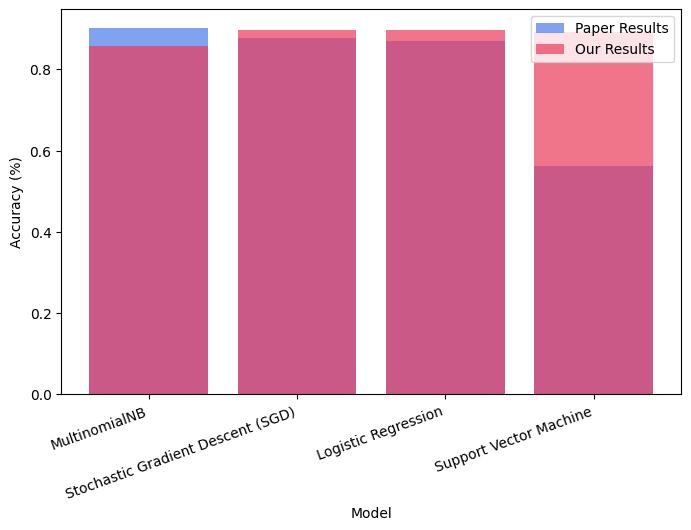

In [52]:
import matplotlib.pyplot as plt

# Plot Accuracy
plt.figure(figsize=(8, 5))
plt.bar(paper_results_df['Model'], paper_results_df['Accuracy (%)'], color='#4b7bec', alpha=0.7, label='Paper Results')
plt.bar(our_results_df['Model'], our_results_df['Accuracy (%)'], color='#eb3b5a', alpha=0.7, label='Our Results')
plt.xlabel('Model')
plt.ylabel('Accuracy (%)')
plt.xticks(rotation=20, ha='right')
plt.legend()
plt.show()

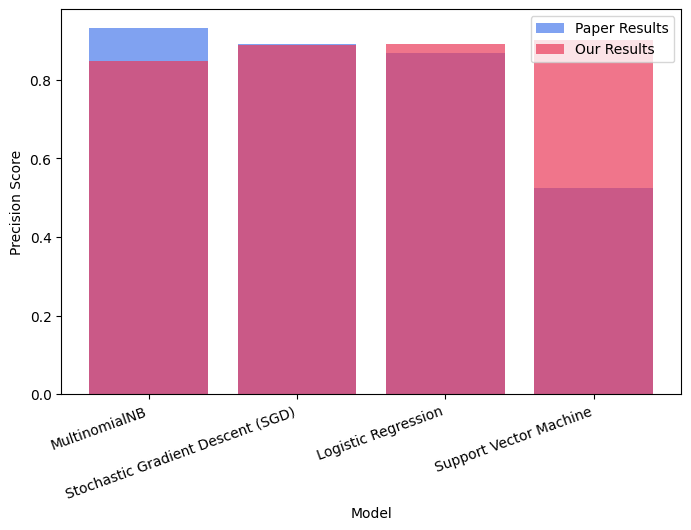

In [53]:
# Plot Precision Score
plt.figure(figsize=(8, 5))
plt.bar(paper_results_df['Model'], paper_results_df['Precision Score'], color='#4b7bec', alpha=0.7, label='Paper Results')
plt.bar(our_results_df['Model'], our_results_df['Precision Score'], color='#eb3b5a', alpha=0.7, label='Our Results')
plt.xlabel('Model')
plt.ylabel('Precision Score')
plt.xticks(rotation=20, ha='right')
plt.legend()
plt.show()

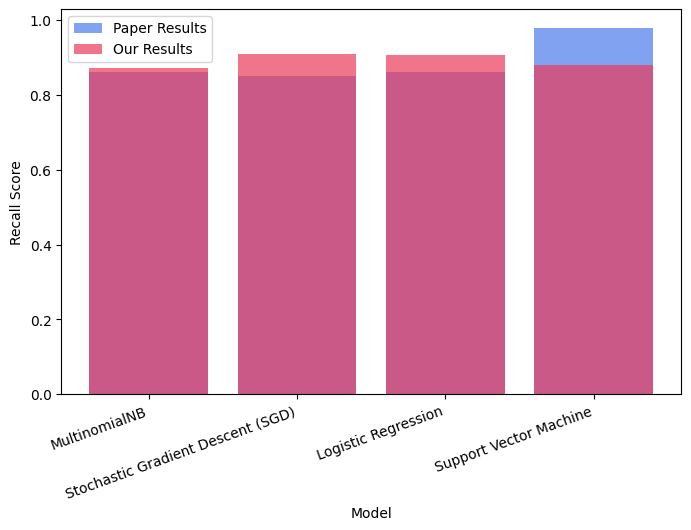

In [54]:
# Plot Recall Score
plt.figure(figsize=(8, 5))
plt.bar(paper_results_df['Model'], paper_results_df['Recall Score'], color='#4b7bec', alpha=0.7, label='Paper Results')
plt.bar(our_results_df['Model'], our_results_df['Recall Score'], color='#eb3b5a', alpha=0.7, label='Our Results')
plt.xlabel('Model')
plt.ylabel('Recall Score')
plt.xticks(rotation=20, ha='right')
plt.legend()
plt.show()

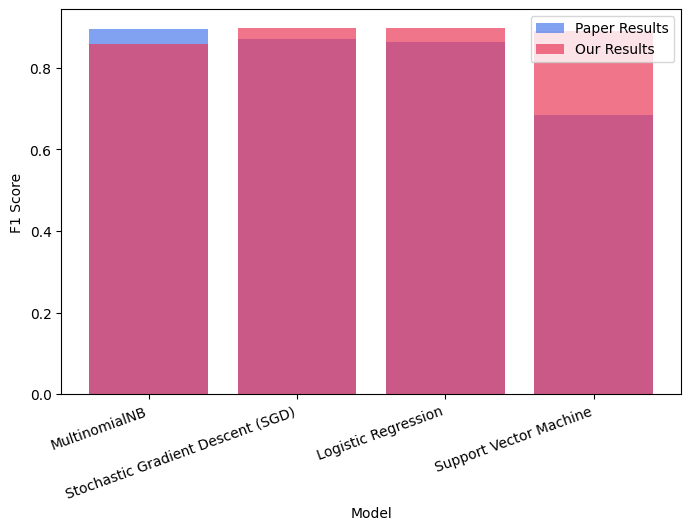

In [55]:
# Plot F1 Score
plt.figure(figsize=(8, 5))
plt.bar(paper_results_df['Model'], paper_results_df['F1 Score'], color='#4b7bec', alpha=0.7, label='Paper Results')
plt.bar(our_results_df['Model'], our_results_df['F1 Score'], color='#eb3b5a', alpha=0.7, label='Our Results')
plt.xlabel('Model')
plt.ylabel('F1 Score')
plt.xticks(rotation=20, ha='right')
plt.legend()
plt.show()